In [2]:
# import packages
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import shap

In [34]:
def get_data(num_sample: int = 5000) -> dict[pd.DataFrame]:
  # read data
  file_list = ["UL_Xtrain.csv", "UL_Xtest.csv", "UL_ytrain.csv", "UL_ytest.csv"]
  dataframes = {}
  for file in file_list:
    dataframes[file] = pd.read_csv(file).sample(num_sample)
  return dataframes # X_train, X_test, y_train, y_test

def drop_columns(input_data: dict[pd.DataFrame]) -> list[pd.DataFrame]:
  cat_cols = ["power_kw", "connector_type", "pricing", "region", "land_use", "metro_area", "charge_level", "venue"]
  non_unique_cal = ["num_ports", "connector_number"]
  output_data = []
  # drop columns
  for key, data in input_data.items():
    if "X" in key:
      output_data.append(data.drop(columns=(cat_cols + non_unique_cal)))
    else:
      output_data.append(data)
  return output_data

def train_isf(X_train: pd.DataFrame) -> IsolationForest:
  # train isolation forest
  isf = IsolationForest(n_estimators=100,
                          max_samples=1000,
                          n_jobs=-1,
                          random_state=42
                          )
  isf.fit(X_train)
  return isf

def train_lof(X_train: pd.DataFrame) -> LocalOutlierFactor:
  # train LOF
  lof = LocalOutlierFactor(novelty=True)
  lof.fit(X_train)
  return lof

def display_shap_plot_ISF(ISF: IsolationForest, X_test: pd.DataFrame):
  explainer_ISF = shap.TreeExplainer(ISF)
  shap_values_ISF = explainer_ISF.shap_values(X_test)
  shap.summary_plot(shap_values_ISF, X_test)

def display_shap_plot_LOF(LOF: LocalOutlierFactor, X_train: pd.DataFrame, X_test: pd.DataFrame, num_of_train_samples: int = 20, num_of_test_samples: int = 100):
  explainer_LOF = shap.KernelExplainer(lambda X: -LOF.decision_function(X), X_train[:num_of_train_samples])  # Use a small subset of training data as the background
  shap_values_LOF = explainer_LOF.shap_values(X_test[:num_of_test_samples])
  shap.summary_plot(shap_values_LOF, X_test[:num_of_test_samples])


In [18]:
X_train, X_test, y_train, y_test = drop_columns(get_data())

In [20]:
ISF = train_isf(X_train)
LOF = train_lof(X_train)

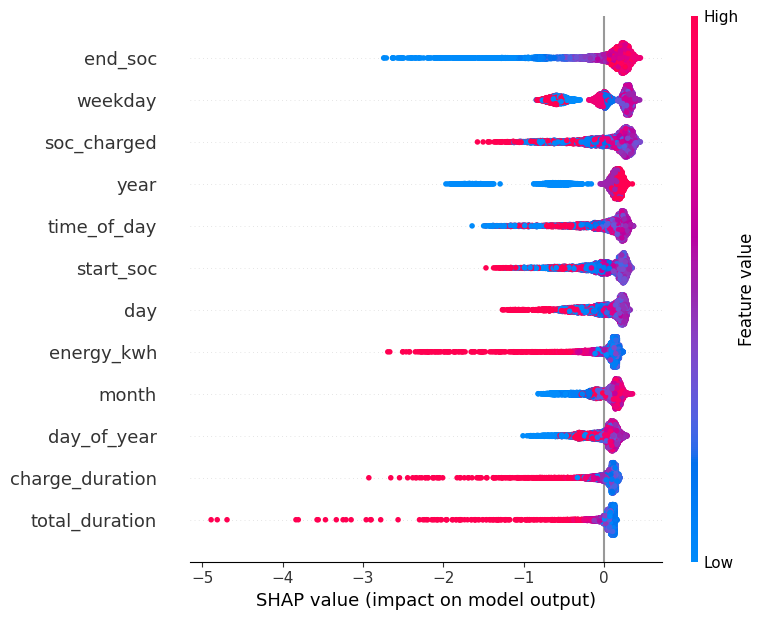

In [31]:
display_shap_plot_ISF(ISF, X_test)

/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/Users/zymoncone/github/milestone_ii/.venv/lib/python3.13/site-packages/sklearn/utils/validation

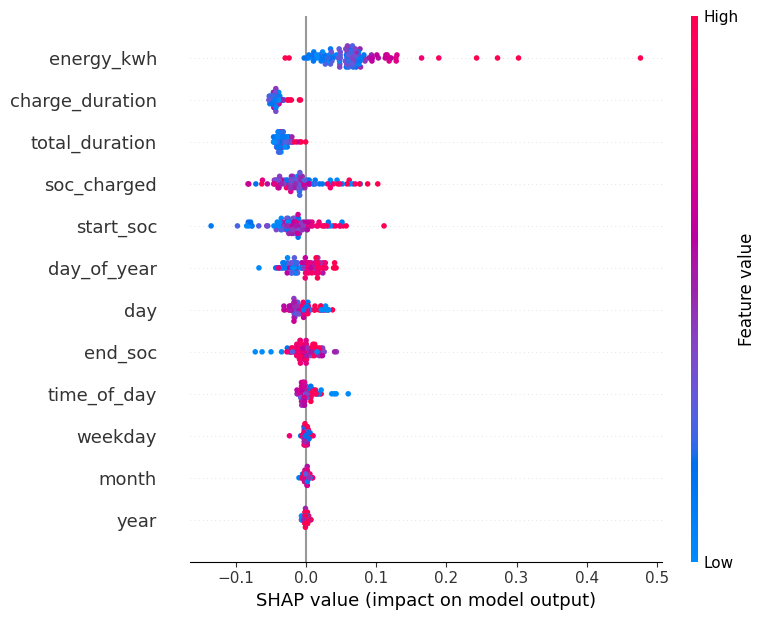

In [35]:
display_shap_plot_LOF(LOF, X_train, X_test)